[View in Colaboratory](https://colab.research.google.com/github/TienPoly/firefly/blob/master/Duckietown_Intro_to_NN_with_PyTorch.ipynb)

# Duckietown Intro to Neural Nets with PyTorch



## Prerequisites

**Step 1:** install pytorch. 乁(ᴗ ͜ʖ ᴗ)ㄏ


**Important:** the following cell is only valid for this notebook. If you're installing pytorch on your own computer (which you totally can, even without a NVIDIA GPU), then please use the instructions from here: https://pytorch.org/get-started/locally/

Note that this will take a few seconds.

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

# http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
  

tcmalloc: large alloc 1073750016 bytes == 0x57c2a000 @  0x7f84eb3011c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8


**Step 2:** import and check that torch works

In [0]:
import torch

torch.rand(2)

tensor([0.8958, 0.2398])

**Step 3:** convert from numpy to torch and back

In [0]:
import numpy as np

a_npy = np.eye(4)
print (a_npy)

a_tor = torch.from_numpy(a_npy) # convert numpy to torch Tensor
print (a_tor)

b_npy = a_tor.numpy() # convert Tensor back to numpy
print (b_npy)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


**Step 4:** Notice that if you change the data EITHER in numpy or torch, you're changing it in both

In [0]:
a_npy[0,3] = 99 # we're only changing the numpy array

a_tor[1,3] = 123 # we're only changing the torch Tensor

print (a_npy) # psych, no we're not
print (a_tor)
print (b_npy)

[[  1.   0.   0.  99.]
 [  0.   1.   0. 123.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
tensor([[  1.,   0.,   0.,  99.],
        [  0.,   1.,   0., 123.],
        [  0.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   1.]], dtype=torch.float64)
[[  1.   0.   0.  99.]
 [  0.   1.   0. 123.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


**Step 5:** Other than that, PyTorch is just like Numpy... but all the things are called different names

In [0]:
# These things do the same thing, but have different names and one is a property, 
# the other one is a function. 

print (a_npy.shape)
print (a_tor.size())

# Most (not all) things that you can do in Numpy, you can also do in PyTorch, 
# but you have to google waht they are called


(4, 4)
torch.Size([4, 4])


## Actual Neural Net Stuff

**Step 6:** This is how you define a neural net in PyTorch

**IMPORTANT:** read the comments. It's crucial that you understand what's happening. If something is unclear, ask us. I legit spent days and weeks making stupid mistakes on all of this when I started in the field and still sometimes do, so ask away now.

In [0]:
import torch # we already did this, but just in case you wanna 
# copy-paste this code block

import torch.nn as nn # functions for neural nets, like layers and loss function
import torch.nn.functional as F #  these are helper functions liks sigmoid, relu, etc

# what's missing here is the import for the optimizer


# you need to create a class that inherits from nn.Module  
# (I mean you don't need to do anything, I'm merely recommending)

class Net(nn.Module):
    def __init__(self):
        # Here in the init function you only create the layers that you wanna 
        # use later on. You're not actually connecting them to anything here.
        # So you can creat them in whatever order.
      
        super(Net, self).__init__()
        
        # 3 color channels input, 6 convolutional kernels -> 6 channels output,
        # and also 5x5 square kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        # after applying this to a 3x32x32 image without padding or stride, 
        # the result will be 6x28x28
        
        # max pooling with a 2x2 moving window
        self.pool = nn.MaxPool2d(2, 2)
        # after applying this to the 6x28x28 image, the result will be
        # 6x14x14 (the channels are not affected)
        
        # 6 channels input, 16 convolutional kernels -> 16 channels output,
        # and also 5x5 square kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        # after applying this to a 6x14x14 image without padding or stride, 
        # the result will be 16x10x10
        
        # Later in the actual forward pass, we will apply the maxpooling twice,
        # but we only have to define it once, because it doesn't have any para-
        # meters that we're backpropping through.
        # So we know that we will apply MaxPool2d(2,2) again to the 16x10x10 image.
        # Therefore the output of the convolutional layers will be 16x5x5.
        
        
        # This layer definition requires that you did the convolution math.
        # The final "image" will be 5 by 5 pixels and 16 channels deep, therefore
        # the input is 16 * 5 * 5.
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        
        # The sizes of these layers are _completely_ arbitrary.
        self.fc2 = nn.Linear(120, 84)
        
        # ultimately our ouput will be a 10-element vector for each input image
        # which corresponds to a one-hot encoding of a 0-9 integer
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # This function is for a single forward pass through the network.
        # So you get the input, pass it through all the layers you defined above
        # (!important, don't define any new layers here) and then return the final
        # result.
        
        # Apply, in that order: convolutional layer 1 (3,6,5), ReLU, MaxPool2d(2,2)
        x = self.pool(F.relu(self.conv1(x)))
        
        # Apply, in that order: convolutional layer 2 (6,16,5), ReLU, MaxPool2d(2,2)
        x = self.pool(F.relu(self.conv2(x)))
        
        # The input is still 3-dimensional (shape: 16x5x5). Here we transform it
        # into a vector of size (16*5*5 = 400)
        x = x.view(-1, 16 * 5 * 5)
        
        # Pass it through fully connected layer 1 and then through ReLU
        x = F.relu(self.fc1(x))
        
        # Pass it through fully connected layer 2 and then through ReLU
        x = F.relu(self.fc2(x))
        
        # Pass it through the last layer WITHOUT RELU and return it
        x = self.fc3(x)
        return x


# here we just instantiate the network, so we can go use it.
net = Net()

# and make sure it's using 32-bit floats ("Float"), not 64-bit floats ("Double")
net = net.float()


**Step 7 (optional):** print the network

In [0]:
print (net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


**Step 8:** Test the network with dummy input

In [0]:
# create a single image (note how the color channel is in the front)
dummy_input = np.random.uniform(low=0, high=1, size=(3,32,32)).astype(np.float32)

# convert to Tensor:
dummy_tensor = torch.from_numpy(dummy_input)

print ("old size:", dummy_tensor.size())

# IMPORTANT. torch works in batches. You can have a batch size of 1 (if it's only)
# a single image, but you need to add the dimension (which you want to become the 
# new axis 0):

dummy_tensor = dummy_tensor.unsqueeze(0)

print ("new size:", dummy_tensor.size(),"<--- see? new magical first dimension")

# now we can feed it into the network:
prediction = net(dummy_tensor)

print ("prediction size:",prediction.size(),"<-- the output has the " \
       "same first dimension")

print ("") # empty line for spaaaaace
print (prediction)




old size: torch.Size([3, 32, 32])
new size: torch.Size([1, 3, 32, 32]) <--- see? new magical first dimension
prediction size: torch.Size([1, 10]) <-- the output has the same first dimension

tensor([[ 0.0876,  0.1036, -0.0070, -0.0911,  0.0069,  0.0303, -0.0479, -0.0166,
         -0.0305, -0.0603]], grad_fn=<ThAddmmBackward>)


**Step 9:** Become German, start optimizing!

In [0]:
import torch.optim as optim

# instead of Mean Squared Error (MSE or "L2") loss we use CE loss here because 
# this has great performance if your output is categorical and ideally in range [0,1]
criterion = nn.CrossEntropyLoss()

# stochastic gradient descent... For reasons. (Remember the slides? There are better options)
# and feed the net.parameters() to the optimizer - that's all the optimizable 
# parameters in the netwoprk
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**Step 10:** Do a trial run of the optimization

In [0]:
# let's stack ("concatenate" - "torch.cat()") 4 images into a minibatch:
inputs = torch.cat([dummy_tensor, dummy_tensor, dummy_tensor, dummy_tensor], dim=0).float()
print ("inputs.size()", inputs.size())

# let's make some dummy labels - notice how it's only the batch dimension
labels = torch.zeros(4).long()
print ("labels.size()",labels.size())

# zero the parameter gradients (always do this during learning before every forward pass)
optimizer.zero_grad()

# predict the outputs
outputs = net(inputs)
print ("outputs.size()", outputs.size())

# now we have a problem: our labels are unidimensional, but the prediction is
# 10-dimensional (on purpose)... what do?
# Answer: you can either spread out the ground truth into one-hot encoding
# OOOOR: you can use a loss function that can accept both: CrossEntropy. ( ͡° ͜ʖ ͡°)
  
loss = criterion(outputs, labels) # apply the loss function, notice the format of 
# loss(prediction, ground_truth) <-- that's important

# calculate the backpropagation values
loss.backward()

# apply the backprop values according to the optimizer
optimizer.step()

# And print loss - very important - PLOT THIS! If this doesn't go a lot lower
# then you are done and the network is converged
print ("Loss:", loss.item())





# Now run this cell couple of times and watch the loss go down. 

inputs.size() torch.Size([4, 3, 32, 32])
labels.size() torch.Size([4])
outputs.size() torch.Size([4, 10])
Loss: 2.1836884021759033


## Now for some hashtag bigdata

**Step 11:** Load the CIFAR-10 dataset

(no worries it's a standard image dataset, it's very smol and you can download it directly through torch, without manually downloading it)

In [0]:
# torchvision has some helper functions for image-based dataset
import torchvision

# we want to apply certain things to all of our images - that's what transforms do
import torchvision.transforms as transforms


# we would like all of our incoming images to: become a torch Tensor 
# (instead of a numpy array) and we wanna normalize all images 
# normalization: img = (img-mean)/standard_deviation
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # parameters for
# the normalization are meand and std for each channel


# download the training part of the CIFAR-10 dataset and apply transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# wrap that into a multi-threaded data loader for quicker multi-CPU data loading 
# and for being able to shuffle the data and sample whole batches and not just
# single elements
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

# same thing for the test dataset

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

# these are the names of the labels, corresponding to 0,1,2,3, etc.
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# is it a bird? is it a plane?...

Files already downloaded and verified
Files already downloaded and verified


**Step 12:** ALWAYS verify your data!

Before running _any_ experiment, if you're an undergrad or a postdoc, always look at your data and make sure it's what you expect it to be

dataset length: 50000
single image (size): torch.Size([4, 3, 32, 32])
single label: 6
 bird  bird  bird   dog


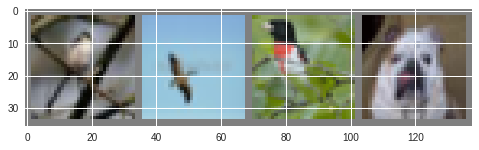

In [0]:
print ("dataset length:",len(trainset))

image, label = trainset[0]

print ("single image (size):",images.size()) # <-- this is a tensor
print ("single label:",label) # <-- this is not, but it will be if we use the "trainloader" from above


### now let's actually -look- at the images

import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images using the trainloader
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images - make a grid of 4
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



In [0]:
print (images.min(), images.mean(), images.max()) # important to verify your distribution

tensor(-1.) tensor(-0.0128) tensor(0.9216)


## Let's glue it all together

**Step 13:** Let's actually run the optimization in a loop with the dataset

In [0]:
print ("[epoch, line of data]")

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):

        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[{}, {}] \tloss: {}'.format(
                epoch + 1, 
                i + 1, 
                running_loss / 2000)
                )
            
            running_loss = 0.0

print('Finished Training')


[epoch, line of data]
[1, 2000] 	loss: 1.2298088152706623
[1, 4000] 	loss: 1.224535327926278
[1, 6000] 	loss: 1.227540152385831
[1, 8000] 	loss: 1.2025431981086732
[1, 10000] 	loss: 1.1652015558481217
[1, 12000] 	loss: 1.1984199027717113
[2, 2000] 	loss: 1.119078600794077
[2, 4000] 	loss: 1.1059417317956686
[2, 6000] 	loss: 1.1212996656745673
[2, 8000] 	loss: 1.1136480078697204
[2, 10000] 	loss: 1.1010444841235876
[2, 12000] 	loss: 1.132534493520856
Finished Training


... Now copy the entire cell below here and run again (to see how the loss converges to something if you run it long enough)

In [0]:
# insert code here

**Step 14:** Inspect again - manually check your predictions

GroundTruth:    cat  ship  ship plane


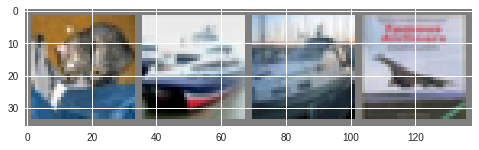

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# now let's get the net's predictions
outputs = net(images)

# argmax the 10 dimensions into one
_, predicted = torch.max(outputs, 1)

# get the names of the labels for each int label
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car  ship


close enough.... I guess 乁( ͡ಠ ʖ̯ ͡ಠ)ㄏ

**Step 15:** Actually get a numerical evaluation

In [0]:
correct = 0
total = 0

# If we're not learning anything then we use the torch.no_grad() environment.
# In this environment no gradients are ever calculated.
with torch.no_grad():
    for data in testloader:
      
        images, labels = data
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy of the network on the " \
      "10000 test images: {}%".format(100 * correct / total))

Accuracy of the network on the 10000 test images: 58.0%


## Homework (yes, yes I know...)

**Goal: improve the score, i.e. the test set accuracy**

Ideas:
- try out a different optimizer
- try out more training epochs
- try out a bigger neural network (more hidden nodes or more layers) 
- try plotting the loss over time and stop training when the loss converges
- (if you're fancy) try out dataset augmentation - that means applying more transformations to your images before feeding them to the network - like random rotation, random noise, etc. Here's a ist of all transforms: https://pytorch.org/docs/stable/torchvision/transforms.html

Send me an email with your best score before Sunday midnight, and send me a link to your notebook/colab. The top 3 contributions wil get a cookie.